In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
import pandas as pd

# Data from Table 1
data = {
    'i': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'y': [20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03]
}

x = np.array(data['x'])
y = np.array(data['y'])

print("Dataset:")
df = pd.DataFrame(data)
print(df.to_string(index=False))
print()











Dataset:
 i  x      y
 1  0  20.26
 2  1   5.61
 3  2   3.14
 4  3 -30.00
 5  4 -40.00
 6  5  -8.13
 7  6 -11.73
 8  7 -16.08
 9  8 -19.95
10  9 -24.03



Task 2: Linear Regression Model
Slope (coefficient): -3.5573
Intercept: 3.9167
Model equation: y = -3.5573x + 3.9167



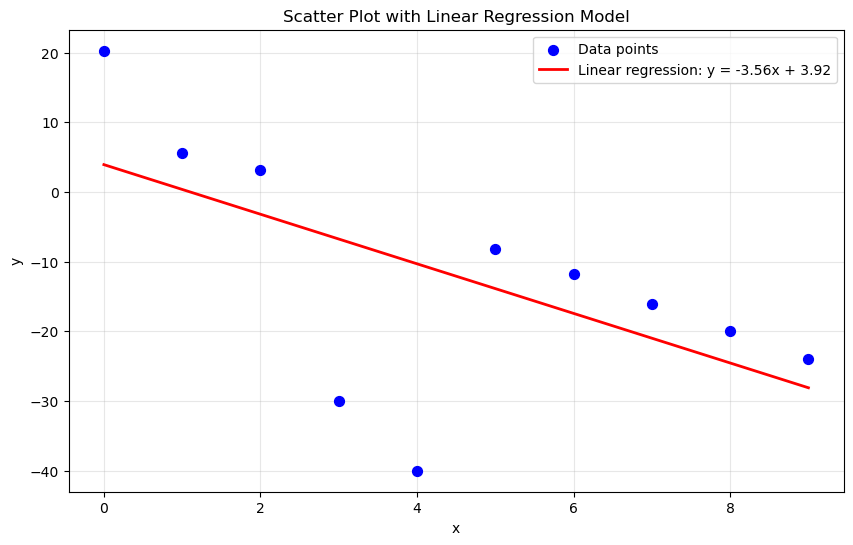

In [21]:
# Task 2: Linear regression model and scatter plot
X = x.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_
print(f"Task 2: Linear Regression Model")
print(f"Slope (coefficient): {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"Model equation: y = {slope:.4f}x + {intercept:.4f}")
print()

# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', s=50, label='Data points', zorder=3)
plt.plot(x, model.predict(X), color='red', linewidth=2, label=f'Linear regression: y = {slope:.2f}x + {intercept:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot with Linear Regression Model')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('scatter_plot_regression.png', dpi=300, bbox_inches='tight')
plt.show()

In [22]:
# Task 3: Given models
print("Task 3: Given Models")
print("Model 1: y = -4x + 12")
print("Model 2: y = -3.55x + 3.91")
print()

# Model predictions
def model1_predict(x_val):
    return -4 * x_val + 12

def model2_predict(x_val):
    return -3.55 * x_val + 3.91

Task 3: Given Models
Model 1: y = -4x + 12
Model 2: y = -3.55x + 3.91



In [23]:
# Task 4: Calculate loss function for different beta values
def robust_loss(y_true, y_pred, beta):
    """Calculate robust loss function L(θ,β)"""
    N = len(y_true)
    numerator = (y_true - y_pred)**2
    denominator = (y_true - y_pred)**2 + beta**2
    loss = (1/N) * np.sum(numerator / denominator)
    return loss

print("Task 4: Loss Function Calculations")
beta_values = [1, 1e-6, 1e3]

# Predictions for both models
y_pred_model1 = model1_predict(x)
y_pred_model2 = model2_predict(x)

print("\nModel 1 predictions:")
for i in range(len(x)):
    print(f"x={x[i]}: y_true={y[i]:.2f}, y_pred={y_pred_model1[i]:.2f}")

print("\nModel 2 predictions:")
for i in range(len(x)):
    print(f"x={x[i]}: y_true={y[i]:.2f}, y_pred={y_pred_model2[i]:.2f}")

print("\nLoss function values:")
print("β\t\tModel 1 Loss\tModel 2 Loss")
print("-" * 50)

for beta in beta_values:
    loss1 = robust_loss(y, y_pred_model1, beta)
    loss2 = robust_loss(y, y_pred_model2, beta)
    print(f"{beta}\t\t{loss1:.6f}\t{loss2:.6f}")

print()


Task 4: Loss Function Calculations

Model 1 predictions:
x=0: y_true=20.26, y_pred=12.00
x=1: y_true=5.61, y_pred=8.00
x=2: y_true=3.14, y_pred=4.00
x=3: y_true=-30.00, y_pred=0.00
x=4: y_true=-40.00, y_pred=-4.00
x=5: y_true=-8.13, y_pred=-8.00
x=6: y_true=-11.73, y_pred=-12.00
x=7: y_true=-16.08, y_pred=-16.00
x=8: y_true=-19.95, y_pred=-20.00
x=9: y_true=-24.03, y_pred=-24.00

Model 2 predictions:
x=0: y_true=20.26, y_pred=3.91
x=1: y_true=5.61, y_pred=0.36
x=2: y_true=3.14, y_pred=-3.19
x=3: y_true=-30.00, y_pred=-6.74
x=4: y_true=-40.00, y_pred=-10.29
x=5: y_true=-8.13, y_pred=-13.84
x=6: y_true=-11.73, y_pred=-17.39
x=7: y_true=-16.08, y_pred=-20.94
x=8: y_true=-19.95, y_pred=-24.49
x=9: y_true=-24.03, y_pred=-28.04

Loss function values:
β		Model 1 Loss	Model 2 Loss
--------------------------------------------------
1		0.435416	0.972847
1e-06		1.000000	1.000000
1000.0		0.000227	0.000188



In [24]:
# Task 5: Suitable β value analysis
print("Task 5: Analysis of Suitable β Value")
print()

# Calculate residuals to understand outliers
residuals_model1 = np.abs(y - y_pred_model1)
residuals_model2 = np.abs(y - y_pred_model2)

print("Residuals Analysis:")
print("Point\tx\ty_true\tModel1_res\tModel2_res")
print("-" * 50)
for i in range(len(x)):
    print(f"{i+1}\t{x[i]}\t{y[i]:.2f}\t{residuals_model1[i]:.2f}\t\t{residuals_model2[i]:.2f}")

print(f"\nMax residual Model 1: {np.max(residuals_model1):.2f}")
print(f"Max residual Model 2: {np.max(residuals_model2):.2f}")
print(f"Mean residual Model 1: {np.mean(residuals_model1):.2f}")
print(f"Mean residual Model 2: {np.mean(residuals_model2):.2f}")

print("\nβ = 1 provides a good balance:")
print("- Not too small (avoids numerical instability)")
print("- Not too large (maintains robustness against outliers)")
print("- Allows moderate down-weighting of large residuals")


Task 5: Analysis of Suitable β Value

Residuals Analysis:
Point	x	y_true	Model1_res	Model2_res
--------------------------------------------------
1	0	20.26	8.26		16.35
2	1	5.61	2.39		5.25
3	2	3.14	0.86		6.33
4	3	-30.00	30.00		23.26
5	4	-40.00	36.00		29.71
6	5	-8.13	0.13		5.71
7	6	-11.73	0.27		5.66
8	7	-16.08	0.08		4.86
9	8	-19.95	0.05		4.54
10	9	-24.03	0.03		4.01

Max residual Model 1: 36.00
Max residual Model 2: 29.71
Mean residual Model 1: 7.81
Mean residual Model 2: 10.57

β = 1 provides a good balance:
- Not too small (avoids numerical instability)
- Not too large (maintains robustness against outliers)
- Allows moderate down-weighting of large residuals



Task 6: Model Selection with Robust Estimator (β = 1)
Model 1 loss (β=1): 0.435416
Model 2 loss (β=1): 0.972847

Selected Model: Model 1 (y = -4x + 12)
Justification: Lower robust loss function value


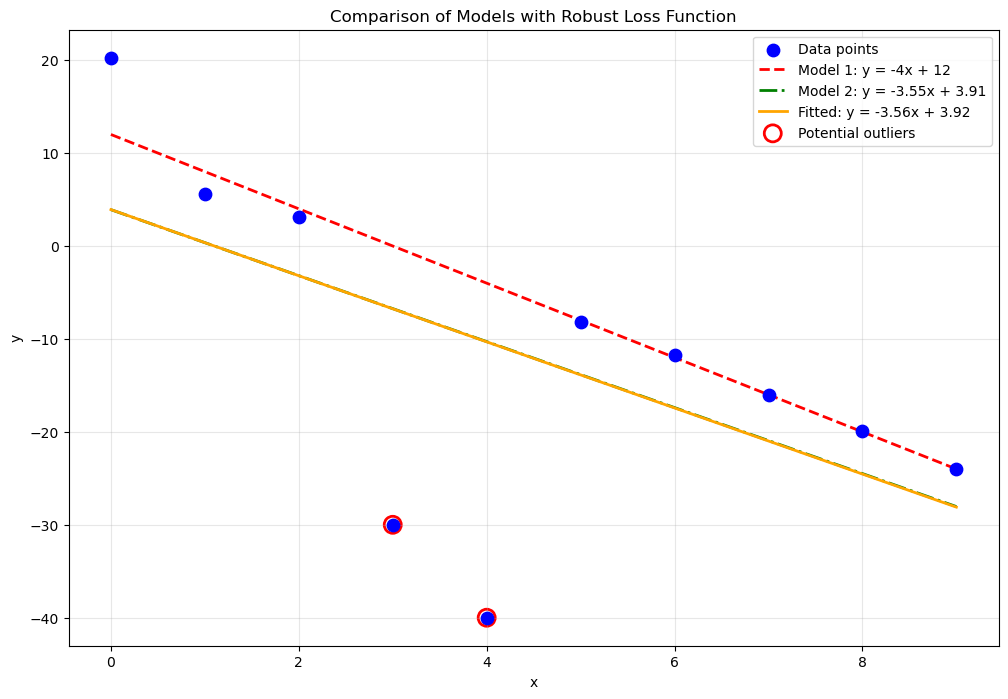

In [25]:
# Task 6: Model selection with robust estimator
print("\nTask 6: Model Selection with Robust Estimator (β = 1)")
beta_selected = 1
loss1_selected = robust_loss(y, y_pred_model1, beta_selected)
loss2_selected = robust_loss(y, y_pred_model2, beta_selected)

print(f"Model 1 loss (β=1): {loss1_selected:.6f}")
print(f"Model 2 loss (β=1): {loss2_selected:.6f}")

if loss1_selected < loss2_selected:
    selected_model = "Model 1"
    print(f"\nSelected Model: Model 1 (y = -4x + 12)")
    print("Justification: Lower robust loss function value")
else:
    selected_model = "Model 2"
    print(f"\nSelected Model: Model 2 (y = -3.55x + 3.91)")
    print("Justification: Lower robust loss function value")

# Visualization of both models with data
plt.figure(figsize=(12, 8))
plt.scatter(x, y, color='blue', s=80, label='Data points', zorder=3)
plt.plot(x, y_pred_model1, color='red', linewidth=2, label='Model 1: y = -4x + 12', linestyle='--')
plt.plot(x, y_pred_model2, color='green', linewidth=2, label='Model 2: y = -3.55x + 3.91', linestyle='-.')
plt.plot(x, model.predict(X), color='orange', linewidth=2, label=f'Fitted: y = {slope:.2f}x + {intercept:.2f}')

# Highlight potential outliers
outlier_threshold = 15
outliers = np.where(np.minimum(residuals_model1, residuals_model2) > outlier_threshold)[0]
if len(outliers) > 0:
    plt.scatter(x[outliers], y[outliers], color='red', s=150, facecolors='none', 
                edgecolors='red', linewidth=2, label='Potential outliers')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Models with Robust Loss Function')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


In [26]:
# Task 7: How robust estimator reduces impact of outliers
print("\nTask 7: How Robust Estimator Reduces Impact of Outliers")
print()

# Calculate weights for each point
def calculate_weights(residuals, beta):
    """Calculate weights used in robust estimation"""
    weights = beta**2 / (residuals**2 + beta**2)
    return weights

weights_model1 = calculate_weights(residuals_model1, beta_selected)
weights_model2 = calculate_weights(residuals_model2, beta_selected)

print("Weights Analysis (β = 1):")
print("Point\tx\ty_true\tModel1_weight\tModel2_weight")
print("-" * 55)
for i in range(len(x)):
    print(f"{i+1}\t{x[i]}\t{y[i]:.2f}\t{weights_model1[i]:.4f}\t\t{weights_model2[i]:.4f}")

print(f"\nPoints with weight < 0.5 are significantly down-weighted")
low_weight_points1 = np.where(weights_model1 < 0.5)[0]
low_weight_points2 = np.where(weights_model2 < 0.5)[0]
print(f"Model 1 - Low weight points: {low_weight_points1 + 1}")
print(f"Model 2 - Low weight points: {low_weight_points2 + 1}")


Task 7: How Robust Estimator Reduces Impact of Outliers

Weights Analysis (β = 1):
Point	x	y_true	Model1_weight	Model2_weight
-------------------------------------------------------
1	0	20.26	0.0144		0.0037
2	1	5.61	0.1490		0.0350
3	2	3.14	0.5748		0.0243
4	3	-30.00	0.0011		0.0018
5	4	-40.00	0.0008		0.0011
6	5	-8.13	0.9834		0.0298
7	6	-11.73	0.9321		0.0303
8	7	-16.08	0.9936		0.0406
9	8	-19.95	0.9975		0.0463
10	9	-24.03	0.9991		0.0585

Points with weight < 0.5 are significantly down-weighted
Model 1 - Low weight points: [1 2 4 5]
Model 2 - Low weight points: [ 1  2  3  4  5  6  7  8  9 10]



Task 8: Alternative Robust Loss Functions

1. Huber Loss:
   L_huber(r) = { 0.5*r² if |r| ≤ δ
                { δ*|r| - 0.5*δ² if |r| > δ

2. Tukey's Biweight Loss:
   L_tukey(r) = { (δ²/6)[1-(1-(r/δ)²)³] if |r| ≤ δ
                { δ²/6 if |r| > δ

3. Cauchy Loss (similar to the given robust estimator):
   L_cauchy(r) = (σ²/2) * log(1 + (r/σ)²)

Huber Loss comparison:
δ		Model 1 Huber Loss	Model 2 Huber Loss
-------------------------------------------------------
0.5		3.817980		5.159000
1.0		7.506960		10.068000
2.0		14.571960		19.136000


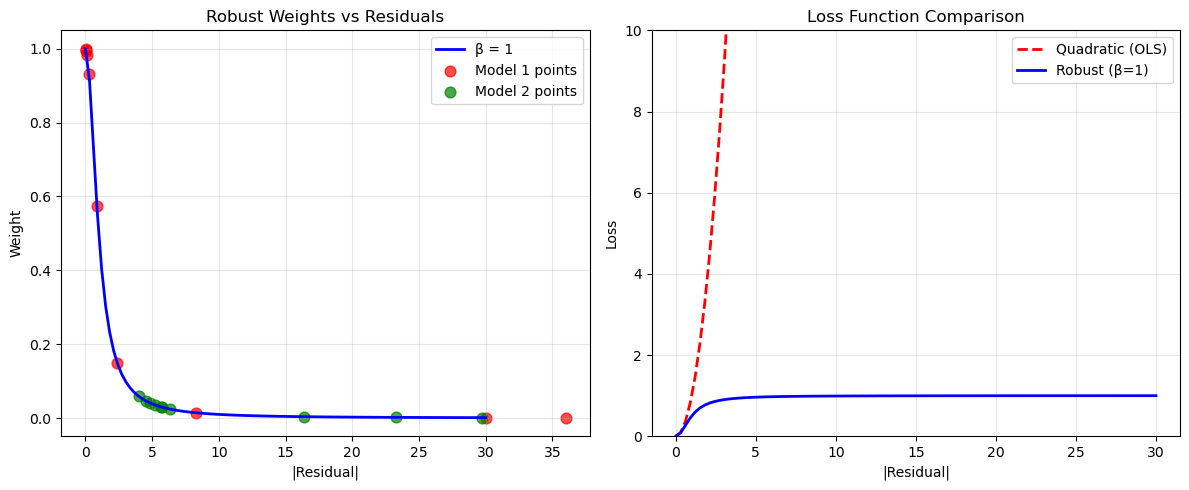


SUMMARY OF RESULTS:
1. Linear regression model: y = -3.56x + 3.92
2. Selected model with robust estimator: Model 1
3. Suitable β value: 1
4. Robust estimator reduces outlier impact by down-weighting large residuals
5. Alternative robust loss functions: Huber, Tukey, Cauchy


In [27]:

# Task 8: Another loss function for robust estimation
print("\nTask 8: Alternative Robust Loss Functions")
print()
print("1. Huber Loss:")
print("   L_huber(r) = { 0.5*r² if |r| ≤ δ")
print("                { δ*|r| - 0.5*δ² if |r| > δ")
print()
print("2. Tukey's Biweight Loss:")
print("   L_tukey(r) = { (δ²/6)[1-(1-(r/δ)²)³] if |r| ≤ δ")
print("                { δ²/6 if |r| > δ")
print()
print("3. Cauchy Loss (similar to the given robust estimator):")
print("   L_cauchy(r) = (σ²/2) * log(1 + (r/σ)²)")

# Demonstrate Huber loss
def huber_loss(y_true, y_pred, delta=1.0):

    """Calculate Huber loss"""
    residuals = y_true - y_pred
    abs_residuals = np.abs(residuals)
    quadratic = np.minimum(abs_residuals, delta)
    linear = abs_residuals - quadratic
    loss = 0.5 * quadratic**2 + delta * linear
    return np.mean(loss)

delta_values = [0.5, 1.0, 2.0]
print("\nHuber Loss comparison:")
print("δ\t\tModel 1 Huber Loss\tModel 2 Huber Loss")
print("-" * 55)
for delta in delta_values:
    huber1 = huber_loss(y, y_pred_model1, delta)
    huber2 = huber_loss(y, y_pred_model2, delta)
    print(f"{delta}\t\t{huber1:.6f}\t\t{huber2:.6f}")

# Create visualization of loss functions
plt.figure(figsize=(12, 5))

# Plot 1: Residuals vs weights
plt.subplot(1, 2, 1)
residuals_range = np.linspace(0, 30, 100)
weights_range = beta_selected**2 / (residuals_range**2 + beta_selected**2)
plt.plot(residuals_range, weights_range, 'b-', linewidth=2, label=f'β = {beta_selected}')
plt.scatter(residuals_model1, weights_model1, color='red', s=60, alpha=0.7, label='Model 1 points')
plt.scatter(residuals_model2, weights_model2, color='green', s=60, alpha=0.7, label='Model 2 points')
plt.xlabel('|Residual|')
plt.ylabel('Weight')
plt.title('Robust Weights vs Residuals')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Loss function behavior
plt.subplot(1, 2, 2)
residuals_range = np.linspace(0, 30, 100)
robust_loss_range = residuals_range**2 / (residuals_range**2 + beta_selected**2)
quadratic_loss_range = residuals_range**2
plt.plot(residuals_range, quadratic_loss_range, 'r--', linewidth=2, label='Quadratic (OLS)')
plt.plot(residuals_range, robust_loss_range, 'b-', linewidth=2, label=f'Robust (β={beta_selected})')
plt.xlabel('|Residual|')
plt.ylabel('Loss')
plt.title('Loss Function Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 10)

plt.tight_layout()
plt.savefig('robust_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*60)
print("SUMMARY OF RESULTS:")
print("="*60)
print(f"1. Linear regression model: y = {slope:.2f}x + {intercept:.2f}")
print(f"2. Selected model with robust estimator: {selected_model}")
print(f"3. Suitable β value: {beta_selected}")
print(f"4. Robust estimator reduces outlier impact by down-weighting large residuals")
print(f"5. Alternative robust loss functions: Huber, Tukey, Cauchy")

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Task 1: Fill the table and plot both loss functions

# Given data
true_y = 1  # All true values are 1
predictions = [0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Calculate MSE for each prediction
def calculate_mse(y_true, y_pred):
    """Calculate Mean Squared Error"""
    return (y_true - y_pred) ** 2

# Calculate BCE for each prediction
def calculate_bce(y_true, y_pred):
    """Calculate Binary Cross Entropy"""
    # Add small epsilon to avoid log(0)
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Calculate loss values
mse_values = []
bce_values = []

for pred in predictions:
    mse = calculate_mse(true_y, pred)
    bce = calculate_bce(true_y, pred)
    mse_values.append(mse)
    bce_values.append(bce)

# Create DataFrame for the table
df = pd.DataFrame({
    'True y': [1] * len(predictions),
    'Prediction ŷ': predictions,
    'MSE': mse_values,
    'BCE': bce_values
})

print("Table 2: MSE and BCE loss values for different predictions when y = 1")
print("=" * 60)
print(df.round(4))
print("=" * 60)





Table 2: MSE and BCE loss values for different predictions when y = 1
    True y  Prediction ŷ     MSE     BCE
0        1         0.005  0.9900  5.2983
1        1         0.010  0.9801  4.6052
2        1         0.050  0.9025  2.9957
3        1         0.100  0.8100  2.3026
4        1         0.200  0.6400  1.6094
5        1         0.300  0.4900  1.2040
6        1         0.400  0.3600  0.9163
7        1         0.500  0.2500  0.6931
8        1         0.600  0.1600  0.5108
9        1         0.700  0.0900  0.3567
10       1         0.800  0.0400  0.2231
11       1         0.900  0.0100  0.1054
12       1         1.000  0.0000  0.0000


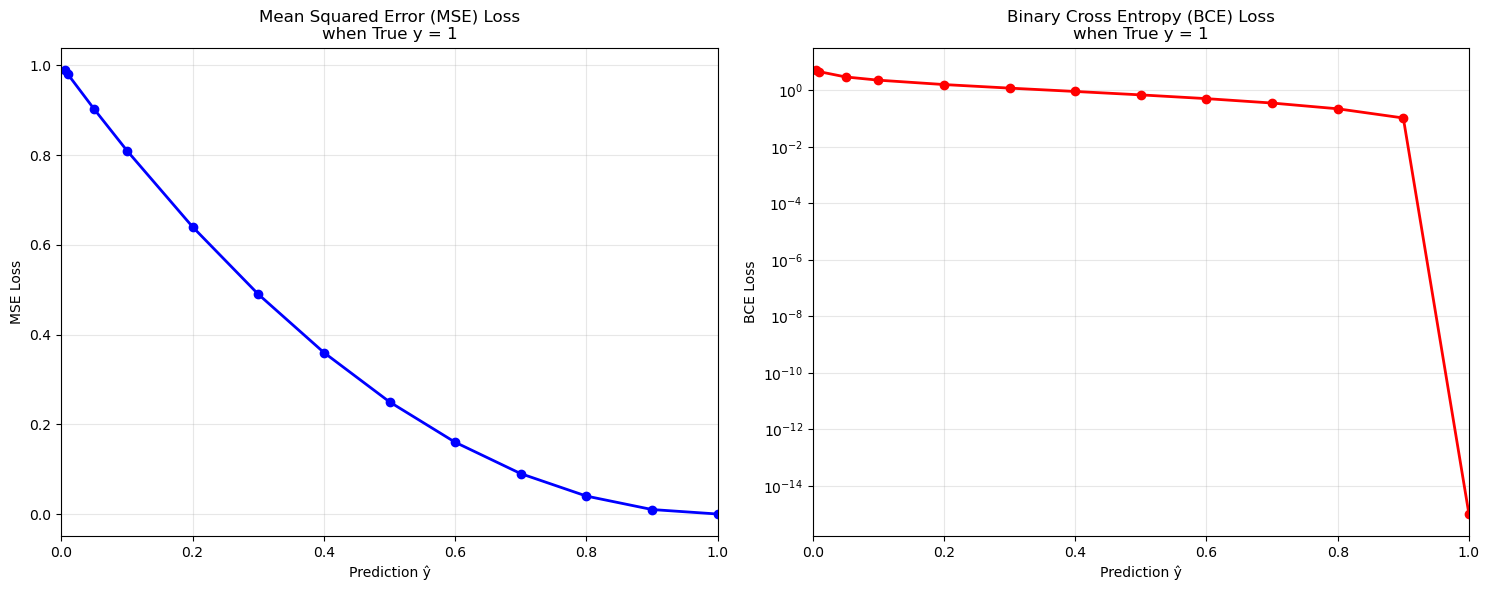

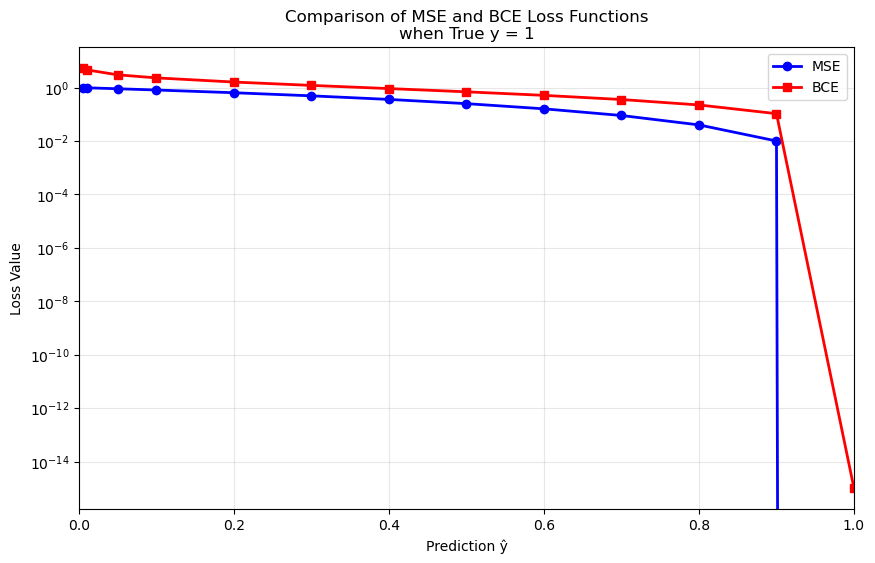

In [31]:
# Create plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot MSE
ax1.plot(predictions, mse_values, 'b-o', linewidth=2, markersize=6)
ax1.set_xlabel('Prediction ŷ')
ax1.set_ylabel('MSE Loss')
ax1.set_title('Mean Squared Error (MSE) Loss\nwhen True y = 1')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 1)

# Plot BCE
ax2.plot(predictions, bce_values, 'r-o', linewidth=2, markersize=6)
ax2.set_xlabel('Prediction ŷ')
ax2.set_ylabel('BCE Loss')
ax2.set_title('Binary Cross Entropy (BCE) Loss\nwhen True y = 1')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 1)
ax2.set_yscale('log')  # Log scale for better visualization

plt.tight_layout()
plt.savefig('loss_functions_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Combined plot for comparison
plt.figure(figsize=(10, 6))
plt.plot(predictions, mse_values, 'b-o', linewidth=2, markersize=6, label='MSE')
plt.plot(predictions, bce_values, 'r-s', linewidth=2, markersize=6, label='BCE')
plt.xlabel('Prediction ŷ')
plt.ylabel('Loss Value')
plt.title('Comparison of MSE and BCE Loss Functions\nwhen True y = 1')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 1)
plt.yscale('log')
plt.savefig('loss_functions_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [32]:
# Print detailed analysis for Task 2
print("\nTASK 2 ANALYSIS:")
print("=" * 50)

print("\n1. APPLICATION 1 (Linear Regression - Continuous dependent variable):")
print("   Recommended Loss Function: MSE (Mean Squared Error)")
print("   Justifications:")
print("   • MSE is specifically designed for continuous target variables")
print("   • It measures the average squared difference between predicted and actual values")
print("   • MSE is differentiable everywhere, making it suitable for gradient-based optimization")
print("   • It penalizes larger errors more heavily due to the squaring operation")
print("   • Standard choice for linear regression problems")

print("\n2. APPLICATION 2 (Logistic Regression - Binary dependent variable):")
print("   Recommended Loss Function: BCE (Binary Cross Entropy)")
print("   Justifications:")
print("   • BCE is specifically designed for binary classification problems")
print("   • It measures the difference between predicted probabilities and true binary labels")
print("   • BCE approaches 0 as predictions approach the true label")
print("   • It provides stronger gradients when predictions are confident but wrong")
print("   • Mathematically derived from maximum likelihood estimation for logistic regression")
print("   • BCE becomes infinite when prediction is 0 for true label 1 (or vice versa),")
print("     providing strong penalty for confident wrong predictions")

print("\nKEY OBSERVATIONS FROM THE PLOTS:")
print("• MSE increases linearly as prediction moves away from true value")
print("• BCE increases exponentially as prediction approaches 0 (when true y = 1)")
print("• BCE provides much stronger penalty for confident wrong predictions")
print("• MSE treats all prediction errors with quadratic penalty")

# Save the table as CSV for LaTeX
df.to_csv('loss_values_table.csv', index=False)
print(f"\nTable saved as 'loss_values_table.csv'")
print(f"Plots saved as 'loss_functions_plot.png' and 'loss_functions_comparison.png'")


TASK 2 ANALYSIS:

1. APPLICATION 1 (Linear Regression - Continuous dependent variable):
   Recommended Loss Function: MSE (Mean Squared Error)
   Justifications:
   • MSE is specifically designed for continuous target variables
   • It measures the average squared difference between predicted and actual values
   • MSE is differentiable everywhere, making it suitable for gradient-based optimization
   • It penalizes larger errors more heavily due to the squaring operation
   • Standard choice for linear regression problems

2. APPLICATION 2 (Logistic Regression - Binary dependent variable):
   Recommended Loss Function: BCE (Binary Cross Entropy)
   Justifications:
   • BCE is specifically designed for binary classification problems
   • It measures the difference between predicted probabilities and true binary labels
   • BCE approaches 0 as predictions approach the true label
   • It provides stronger gradients when predictions are confident but wrong
   • Mathematically derived fro

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

def generate_signal(signal_length, num_nonzero):
    """Generate a sparse signal with specified parameters"""
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 10 * np.random.randn(num_nonzero)
    signal[nonzero_indices] = nonzero_values
    return signal

# Parameters
signal_length = 100  # Total length of the signal
num_nonzero = 10     # Number of non-zero elements in the signal

# Enter your index number (example: 123)
your_index_no = 123  # Replace with your actual index number

# Generate Feature 1 (sparse signal)
sparse_signal = generate_signal(signal_length, num_nonzero)
sparse_signal[10] = (your_index_no % 10) * 2 + 10

if your_index_no % 10 == 0:
    sparse_signal[10] = np.random.randn(1) + 30

sparse_signal = sparse_signal / 5

# Generate Feature 2 (epsilon - noise signal)
epsilon = np.random.normal(0, 15, signal_length)

# Create the features matrix
feature1 = sparse_signal
feature2 = epsilon

print("="*60)
print("DATA PRE-PROCESSING ASSIGNMENT")
print("="*60)
print(f"Index Number: {your_index_no}")
print(f"Signal Length: {signal_length}")
print(f"Number of non-zero elements: {num_nonzero}")
print("="*60)

# Display original feature statistics
print("\nORIGINAL FEATURES STATISTICS:")
print("-"*40)
print(f"Feature 1 (Sparse Signal):")
print(f"  Mean: {np.mean(feature1):.4f}")
print(f"  Std: {np.std(feature1):.4f}")
print(f"  Min: {np.min(feature1):.4f}")
print(f"  Max: {np.max(feature1):.4f}")
print(f"  Range: {np.max(feature1) - np.min(feature1):.4f}")

print(f"\nFeature 2 (Noise Signal):")
print(f"  Mean: {np.mean(feature2):.4f}")
print(f"  Std: {np.std(feature2):.4f}")
print(f"  Min: {np.min(feature2):.4f}")
print(f"  Max: {np.max(feature2):.4f}")
print(f"  Range: {np.max(feature2) - np.min(feature2):.4f}")

# Prepare data for scaling
features_matrix = np.column_stack([feature1, feature2])

# SCALING METHODS

# 1. Standard Scaling (Z-score normalization)
print("\n" + "="*60)
print("SCALING METHODS ANALYSIS")
print("="*60)

scaler_standard = StandardScaler()
features_standard = scaler_standard.fit_transform(features_matrix)

print("\n1. STANDARD SCALING:")
print("-"*30)
print(f"Feature 1 after standard scaling:")
print(f"  Mean: {np.mean(features_standard[:, 0]):.4f}")
print(f"  Std: {np.std(features_standard[:, 0]):.4f}")
print(f"  Min: {np.min(features_standard[:, 0]):.4f}")
print(f"  Max: {np.max(features_standard[:, 0]):.4f}")

print(f"\nFeature 2 after standard scaling:")
print(f"  Mean: {np.mean(features_standard[:, 1]):.4f}")
print(f"  Std: {np.std(features_standard[:, 1]):.4f}")
print(f"  Min: {np.min(features_standard[:, 1]):.4f}")
print(f"  Max: {np.max(features_standard[:, 1]):.4f}")

# 2. Min-Max Scaling
scaler_minmax = MinMaxScaler()
features_minmax = scaler_minmax.fit_transform(features_matrix)

print("\n2. MIN-MAX SCALING:")
print("-"*30)
print(f"Feature 1 after min-max scaling:")
print(f"  Mean: {np.mean(features_minmax[:, 0]):.4f}")
print(f"  Std: {np.std(features_minmax[:, 0]):.4f}")
print(f"  Min: {np.min(features_minmax[:, 0]):.4f}")
print(f"  Max: {np.max(features_minmax[:, 0]):.4f}")

print(f"\nFeature 2 after min-max scaling:")
print(f"  Mean: {np.mean(features_minmax[:, 1]):.4f}")
print(f"  Std: {np.std(features_minmax[:, 1]):.4f}")
print(f"  Min: {np.min(features_minmax[:, 1]):.4f}")
print(f"  Max: {np.max(features_minmax[:, 1]):.4f}")

# 3. Max-Abs Scaling
def max_abs_scaling(data):
    """Custom implementation of Max-Abs scaling"""
    max_abs = np.max(np.abs(data), axis=0)
    return data / max_abs, max_abs

features_maxabs, max_abs_values = max_abs_scaling(features_matrix)

print("\n3. MAX-ABS SCALING:")
print("-"*30)
print(f"Feature 1 after max-abs scaling:")
print(f"  Mean: {np.mean(features_maxabs[:, 0]):.4f}")
print(f"  Std: {np.std(features_maxabs[:, 0]):.4f}")
print(f"  Min: {np.min(features_maxabs[:, 0]):.4f}")
print(f"  Max: {np.max(features_maxabs[:, 0]):.4f}")
print(f"  Max Abs Value Used: {max_abs_values[0]:.4f}")

print(f"\nFeature 2 after max-abs scaling:")
print(f"  Mean: {np.mean(features_maxabs[:, 1]):.4f}")
print(f"  Std: {np.std(features_maxabs[:, 1]):.4f}")
print(f"  Min: {np.min(features_maxabs[:, 1]):.4f}")
print(f"  Max: {np.max(features_maxabs[:, 1]):.4f}")
print(f"  Max Abs Value Used: {max_abs_values[1]:.4f}")

# ANALYSIS AND SELECTION
print("\n" + "="*60)
print("SCALING METHOD SELECTION ANALYSIS")
print("="*60)

print("\nFeature 1 (Sparse Signal) Analysis:")
print("-"*40)
print("• This is a sparse signal with many zeros and few non-zero values")
print("• The sparsity structure is important to preserve")
print("• Standard scaling would center around zero but change the sparsity pattern")
print("• Min-max scaling compresses all values to [0,1] range")
print("• Max-abs scaling preserves zeros and maintains the relative structure")

print("\nFeature 2 (Noise Signal) Analysis:")
print("-"*40)
print("• This is a normally distributed noise signal")
print("• Standard scaling is ideal for normally distributed data")
print("• It centers the data and standardizes the variance")
print("• This preserves the underlying distribution properties")

print("\n" + "="*60)
print("FINAL SELECTION:")
print("="*60)
print("Feature 1: MAX-ABS SCALING")
print("• Preserves sparsity (zeros remain zeros)")
print("• Maintains relative magnitudes between non-zero elements")
print("• Scales to [-1, 1] range without shifting zero elements")

print("\nFeature 2: STANDARD SCALING")
print("• Optimal for normally distributed data")
print("• Centers the data around zero mean")
print("• Standardizes variance to 1")
print("• Preserves the Gaussian distribution properties")

# Apply selected scaling methods
feature1_final = features_maxabs[:, 0]
feature2_final = features_standard[:, 1]

print(f"\nFINAL SCALED FEATURES STATISTICS:")
print("-"*40)
print(f"Feature 1 (Max-Abs Scaled):")
print(f"  Mean: {np.mean(feature1_final):.4f}")
print(f"  Std: {np.std(feature1_final):.4f}")
print(f"  Min: {np.min(feature1_final):.4f}")
print(f"  Max: {np.max(feature1_final):.4f}")
print(f"  Zeros preserved: {np.sum(feature1_final == 0)} out of {len(feature1_final)}")

print(f"\nFeature 2 (Standard Scaled):")
print(f"  Mean: {np.mean(feature2_final):.4f}")
print(f"  Std: {np.std(feature2_final):.4f}")
print(f"  Min: {np.min(feature2_final):.4f}")
print(f"  Max: {np.max(feature2_final):.4f}")



DATA PRE-PROCESSING ASSIGNMENT
Index Number: 123
Signal Length: 100
Number of non-zero elements: 10

ORIGINAL FEATURES STATISTICS:
----------------------------------------
Feature 1 (Sparse Signal):
  Mean: 0.0357
  Std: 0.5714
  Min: -2.2478
  Max: 3.2000
  Range: 5.4478

Feature 2 (Noise Signal):
  Mean: 0.8066
  Std: 14.8558
  Min: -29.0987
  Max: 44.1550
  Range: 73.2536

SCALING METHODS ANALYSIS

1. STANDARD SCALING:
------------------------------
Feature 1 after standard scaling:
  Mean: 0.0000
  Std: 1.0000
  Min: -3.9965
  Max: 5.5381

Feature 2 after standard scaling:
  Mean: -0.0000
  Std: 1.0000
  Min: -2.0130
  Max: 2.9179

2. MIN-MAX SCALING:
------------------------------
Feature 1 after min-max scaling:
  Mean: 0.4192
  Std: 0.1049
  Min: 0.0000
  Max: 1.0000

Feature 2 after min-max scaling:
  Mean: 0.4082
  Std: 0.2028
  Min: 0.0000
  Max: 1.0000

3. MAX-ABS SCALING:
------------------------------
Feature 1 after max-abs scaling:
  Mean: 0.0112
  Std: 0.1786
  Min: -0.


GENERATING VISUALIZATIONS...


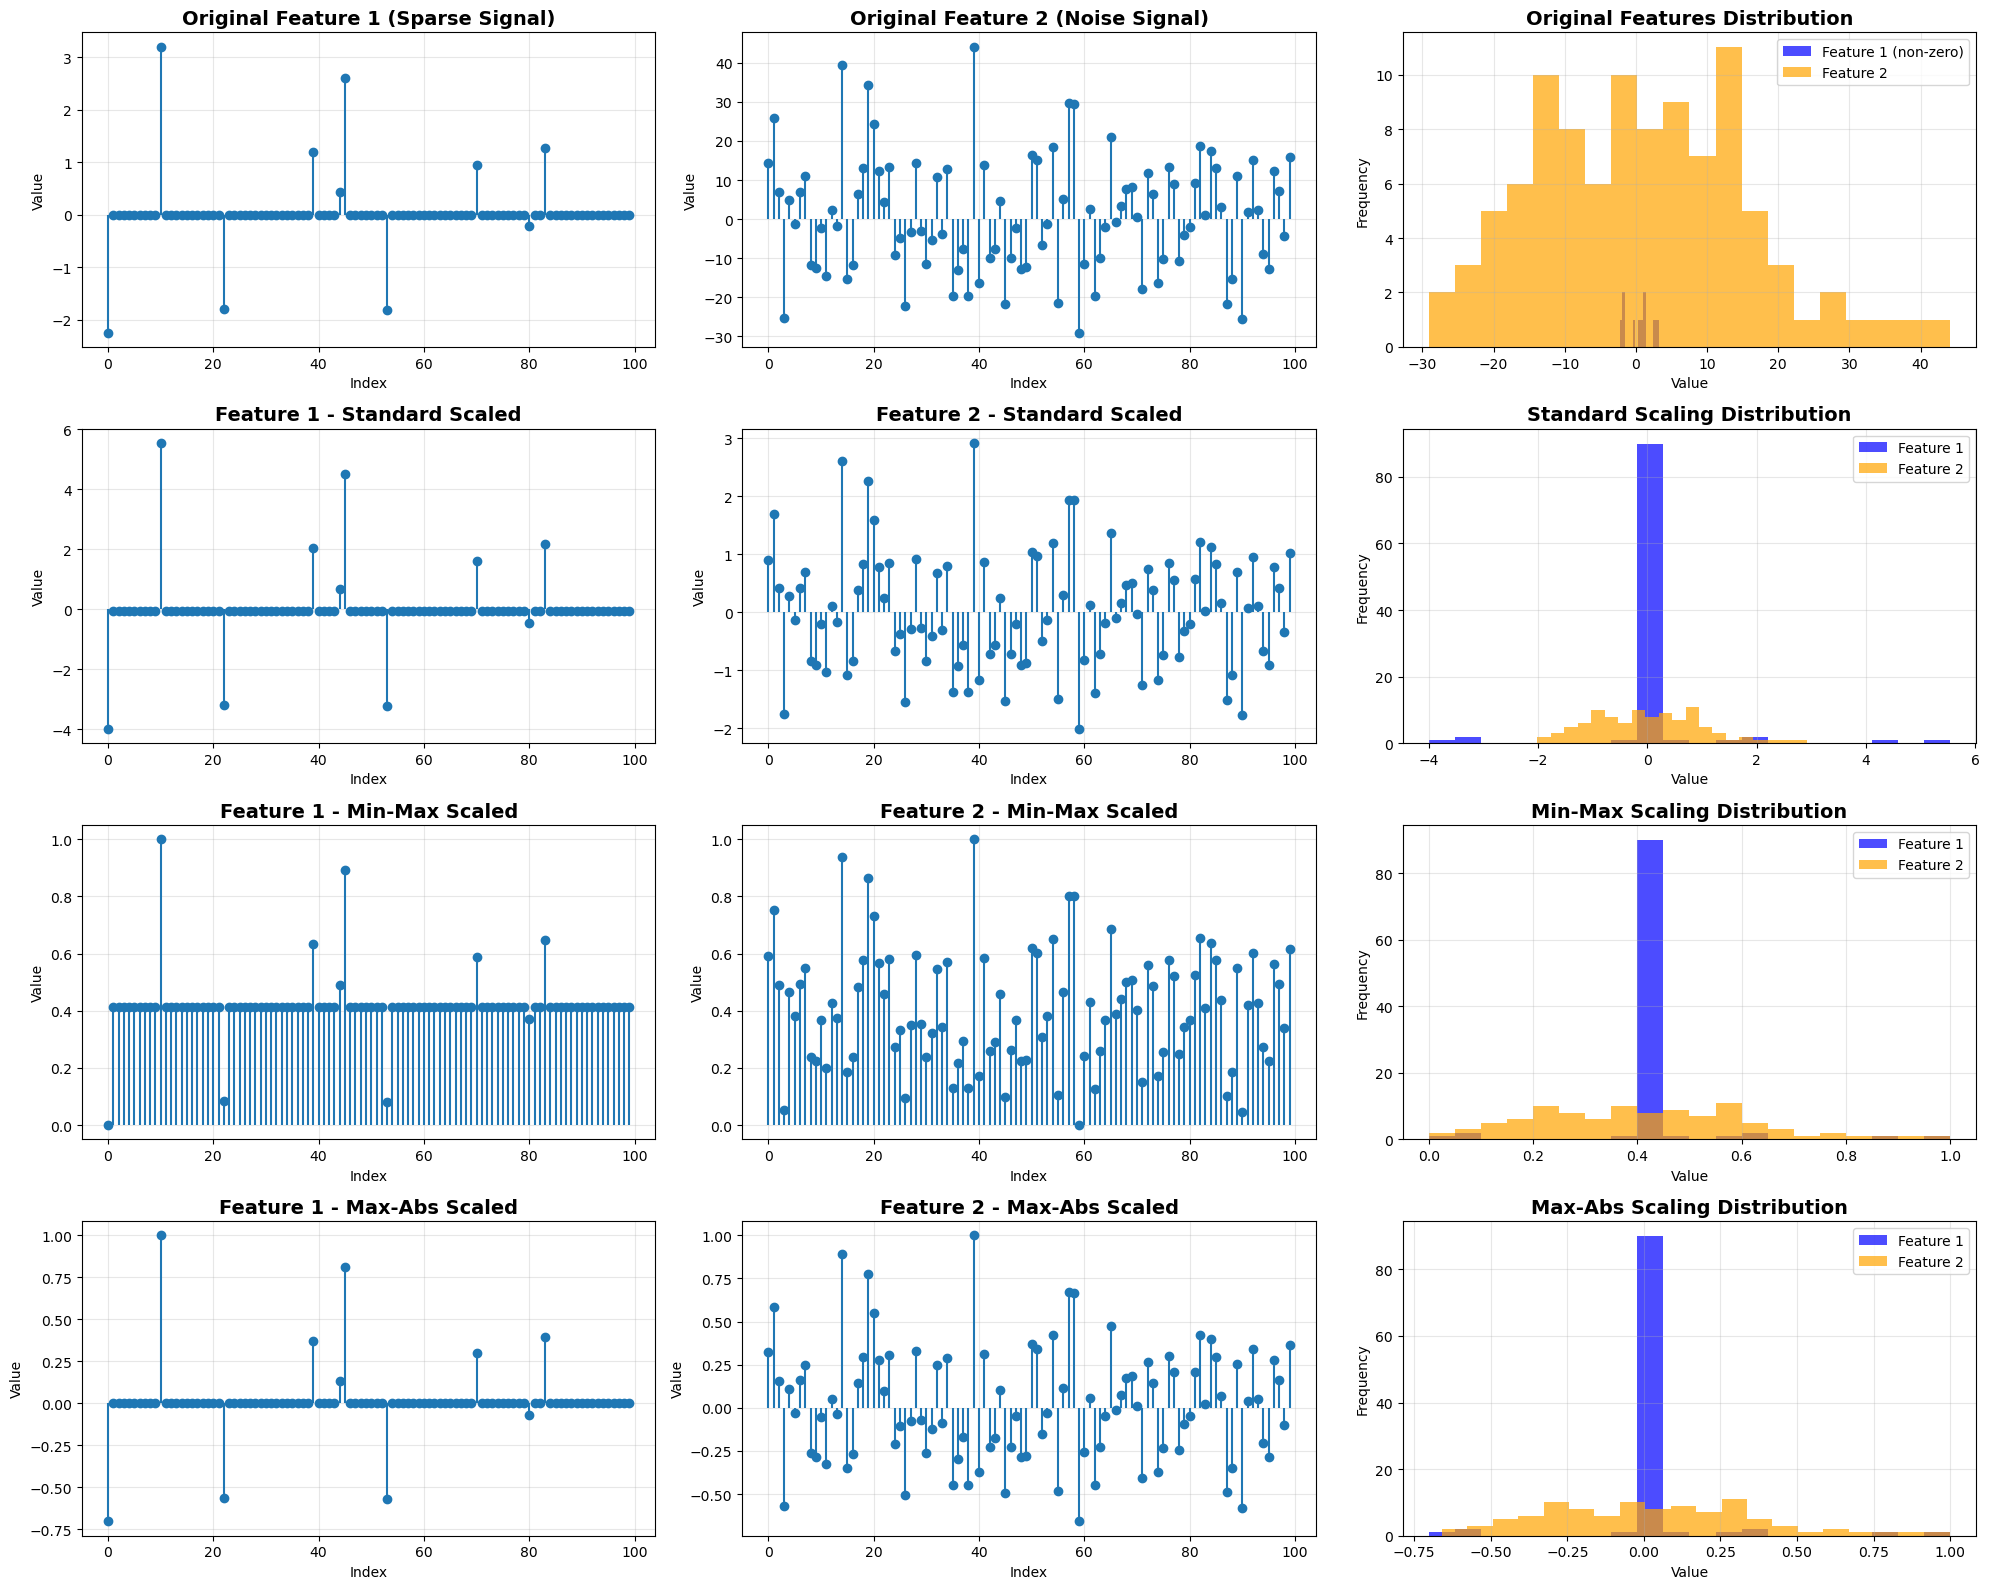

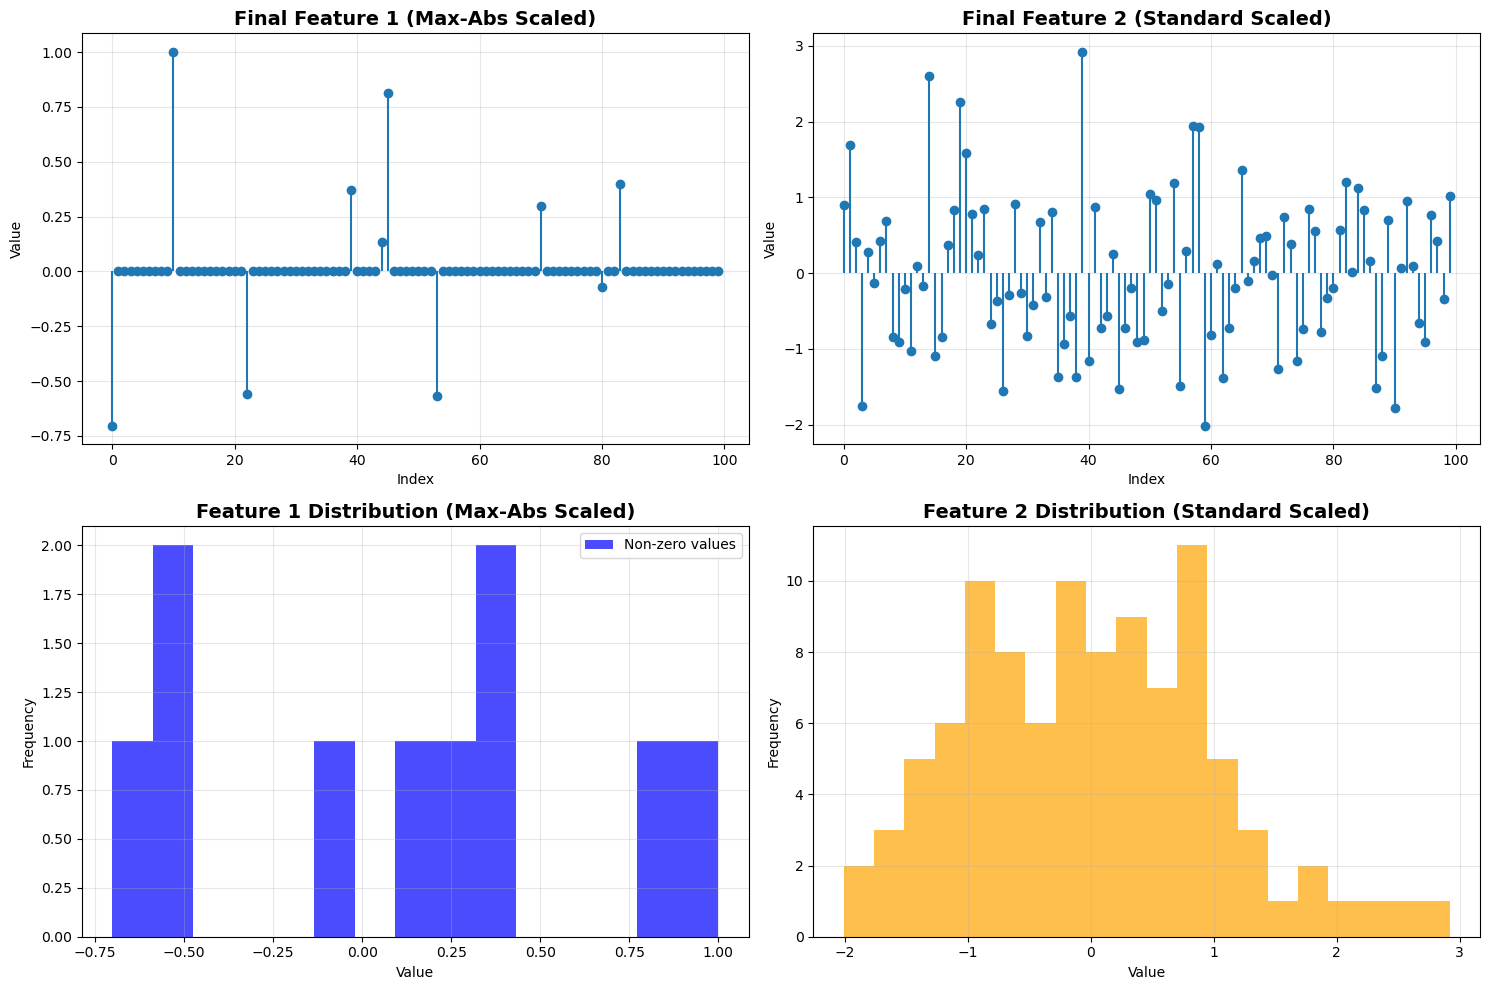

Visualizations saved as 'scaling_comparison.png' and 'final_features.png'

Assignment completed successfully!


In [35]:
# VISUALIZATION
print("\n" + "="*60)
print("GENERATING VISUALIZATIONS...")
print("="*60)

# Create comprehensive visualizations
plt.style.use('default')
fig = plt.figure(figsize=(20, 16))

# Original Features
plt.subplot(4, 3, 1)
plt.stem(range(signal_length), feature1, basefmt=" ")
plt.title('Original Feature 1 (Sparse Signal)', fontsize=14, fontweight='bold')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)

plt.subplot(4, 3, 2)
plt.stem(range(signal_length), feature2, basefmt=" ")
plt.title('Original Feature 2 (Noise Signal)', fontsize=14, fontweight='bold')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)

plt.subplot(4, 3, 3)
plt.hist(feature1[feature1 != 0], bins=15, alpha=0.7, label='Feature 1 (non-zero)', color='blue')
plt.hist(feature2, bins=20, alpha=0.7, label='Feature 2', color='orange')
plt.title('Original Features Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

# Standard Scaling Results
plt.subplot(4, 3, 4)
plt.stem(range(signal_length), features_standard[:, 0], basefmt=" ")
plt.title('Feature 1 - Standard Scaled', fontsize=14, fontweight='bold')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)

plt.subplot(4, 3, 5)
plt.stem(range(signal_length), features_standard[:, 1], basefmt=" ")
plt.title('Feature 2 - Standard Scaled', fontsize=14, fontweight='bold')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)

plt.subplot(4, 3, 6)

plt.hist(features_standard[:, 0], bins=20, alpha=0.7, label='Feature 1', color='blue')
plt.hist(features_standard[:, 1], bins=20, alpha=0.7, label='Feature 2', color='orange')
plt.title('Standard Scaling Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

# Min-Max Scaling Results
plt.subplot(4, 3, 7)
plt.stem(range(signal_length), features_minmax[:, 0], basefmt=" ")
plt.title('Feature 1 - Min-Max Scaled', fontsize=14, fontweight='bold')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)

plt.subplot(4, 3, 8)
plt.stem(range(signal_length), features_minmax[:, 1], basefmt=" ")
plt.title('Feature 2 - Min-Max Scaled', fontsize=14, fontweight='bold')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)

plt.subplot(4, 3, 9)
plt.hist(features_minmax[:, 0], bins=20, alpha=0.7, label='Feature 1', color='blue')
plt.hist(features_minmax[:, 1], bins=20, alpha=0.7, label='Feature 2', color='orange')
plt.title('Min-Max Scaling Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

# Max-Abs Scaling Results
plt.subplot(4, 3, 10)
plt.stem(range(signal_length), features_maxabs[:, 0], basefmt=" ")
plt.title('Feature 1 - Max-Abs Scaled', fontsize=14, fontweight='bold')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)

plt.subplot(4, 3, 11)
plt.stem(range(signal_length), features_maxabs[:, 1], basefmt=" ")
plt.title('Feature 2 - Max-Abs Scaled', fontsize=14, fontweight='bold')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)

plt.subplot(4, 3, 12)
plt.hist(features_maxabs[:, 0], bins=20, alpha=0.7, label='Feature 1', color='blue')
plt.hist(features_maxabs[:, 1], bins=20, alpha=0.7, label='Feature 2', color='orange')
plt.title('Max-Abs Scaling Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('scaling_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


# Create final selected features visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Final selected features
axes[0, 0].stem(range(signal_length), feature1_final, basefmt=" ")
axes[0, 0].set_title('Final Feature 1 (Max-Abs Scaled)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Index')
axes[0, 0].set_ylabel('Value')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].stem(range(signal_length), feature2_final, basefmt=" ")
axes[0, 1].set_title('Final Feature 2 (Standard Scaled)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Index')
axes[0, 1].set_ylabel('Value')
axes[0, 1].grid(True, alpha=0.3)

# Distribution comparison
axes[1, 0].hist(feature1_final[feature1_final != 0], bins=15, alpha=0.7, color='blue', label='Non-zero values')
axes[1, 0].set_title('Feature 1 Distribution (Max-Abs Scaled)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Value')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(feature2_final, bins=20, alpha=0.7, color='orange')
axes[1, 1].set_title('Feature 2 Distribution (Standard Scaled)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Value')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('final_features.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualizations saved as 'scaling_comparison.png' and 'final_features.png'")
print("\nAssignment completed successfully!")
print("="*60)